In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [8]:
VariedArraySizes_data = pd.read_csv('Selected_Array_Sizes_Part_Ci-1.csv')

VariedArraySizes_data.head()

,Size,Threshold,Comparisons,CPU Time (ms)
0,1000,50,13263,0.065
1,5000,50,87014,0.340
2,10000,50,184069,0.728
3,50000,50,1140529,4.102
4,100000,50,2387245,9.080


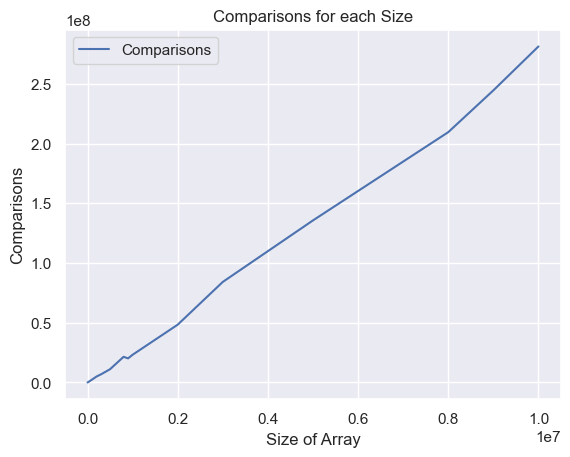

In [9]:
VariedArraySizes_data.plot(x= 'Size', y = 'Comparisons')

plt.title('Comparisons for each Size')
plt.xlabel('Size of Array')
plt.ylabel('Comparisons')
plt.grid(True)

plt.show()

In [21]:
SizesDF = pd.DataFrame(VariedArraySizes_data['Size'])
TimeDF = pd.DataFrame(VariedArraySizes_data['CPU Time (ms)'])
joint_sizestime = pd.concat([SizesDF, TimeDF], axis = 1).reindex(TimeDF.index)
joint_sizestime.head(n=20)

,Size,CPU Time (ms)
0,1000,0.065
1,5000,0.340
2,10000,0.728
3,50000,4.102
4,100000,9.080
5,200000,18.743
6,300000,29.257
7,500000,50.481
8,800000,87.295
9,900000,96.972


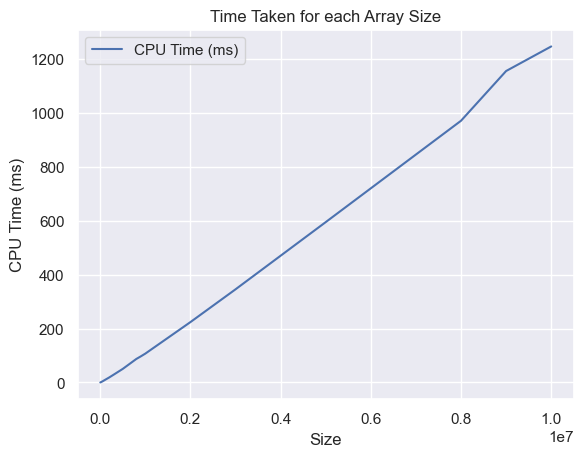

In [30]:
joint_sizestime.plot(x= 'Size', y= 'CPU Time (ms)')

plt.title('Time Taken for each Array Size')  # Title
plt.xlabel('Size')  # X-axis label
plt.ylabel('CPU Time (ms)')  # Y-axis label
plt.grid(True)

plt.show()

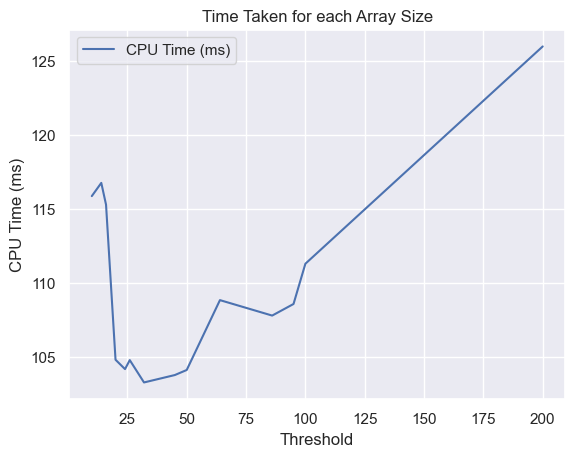

In [32]:
VariedS_data = pd.read_csv('Different_S_Values_Part_Cii-1.csv')

VariedS_DF = pd.DataFrame(VariedS_data['Threshold'])
TimeDF = pd.DataFrame(VariedS_data['CPU Time (ms)'])
joint_Stime = pd.concat([VariedS_DF, TimeDF], axis = 1).reindex(TimeDF.index)
joint_Stime = joint_Stime[:-2] # dropped S = 500 and S = 1000 as they dont value add to the results.
joint_Stime.plot(x= 'Threshold', y= 'CPU Time (ms)')

plt.title('Time Taken for each Array Size')  # Title
plt.xlabel('Threshold')  # X-axis label
plt.ylabel('CPU Time (ms)')  # Y-axis label
plt.grid(True)

plt.show()

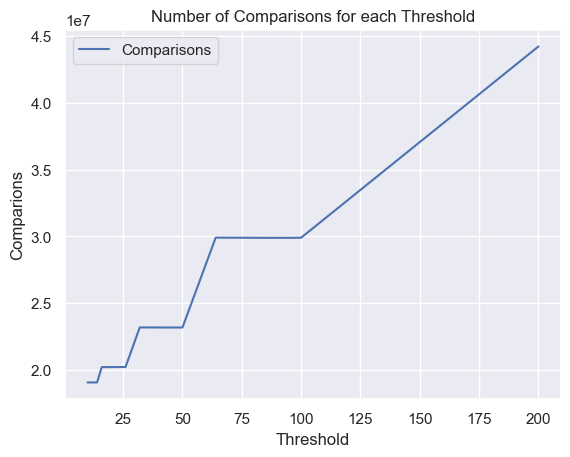

In [34]:
VariedS_data = VariedS_data[:-2]
VariedS_data.plot(x = 'Threshold', y= 'Comparisons')

plt.title('Number of Comparisons for each Threshold')
plt.xlabel('Threshold')
plt.ylabel('Comparions')
plt.grid(True)

plt.show()

In [3]:
OptimalS_data = pd.read_csv('Optimal_S_Part_Ciii.csv')

Size_DF = pd.DataFrame(OptimalS_data['Size'])
DifferentS_DF = pd.DataFrame(OptimalS_data['Threshold'])
TimeDF = pd.DataFrame(OptimalS_data['CPU Time (ms)'])
joint_DF = pd.concat([Size_DF, TimeDF, DifferentS_DF], axis = 1)

joint_DF = joint_DF[joint_DF['Threshold'] <=100]
joint_DF.head(n=20)

,Size,CPU Time (ms),Threshold
0,100000,22.689,10
1,100000,15.807,14
2,100000,12.326,16
3,100000,11.144,20
4,100000,9.753,24
5,100000,8.965,26
6,100000,11.619,32
7,100000,10.096,45
8,100000,9.233,50
9,100000,9.232,64


/var/folders/mp/x3_7_p_x2dx1tql7w4kss0j40000gn/T/ipykernel_90913/1593522008.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = joint_DF.pivot( "Size", "Threshold", "CPU Time (ms)")


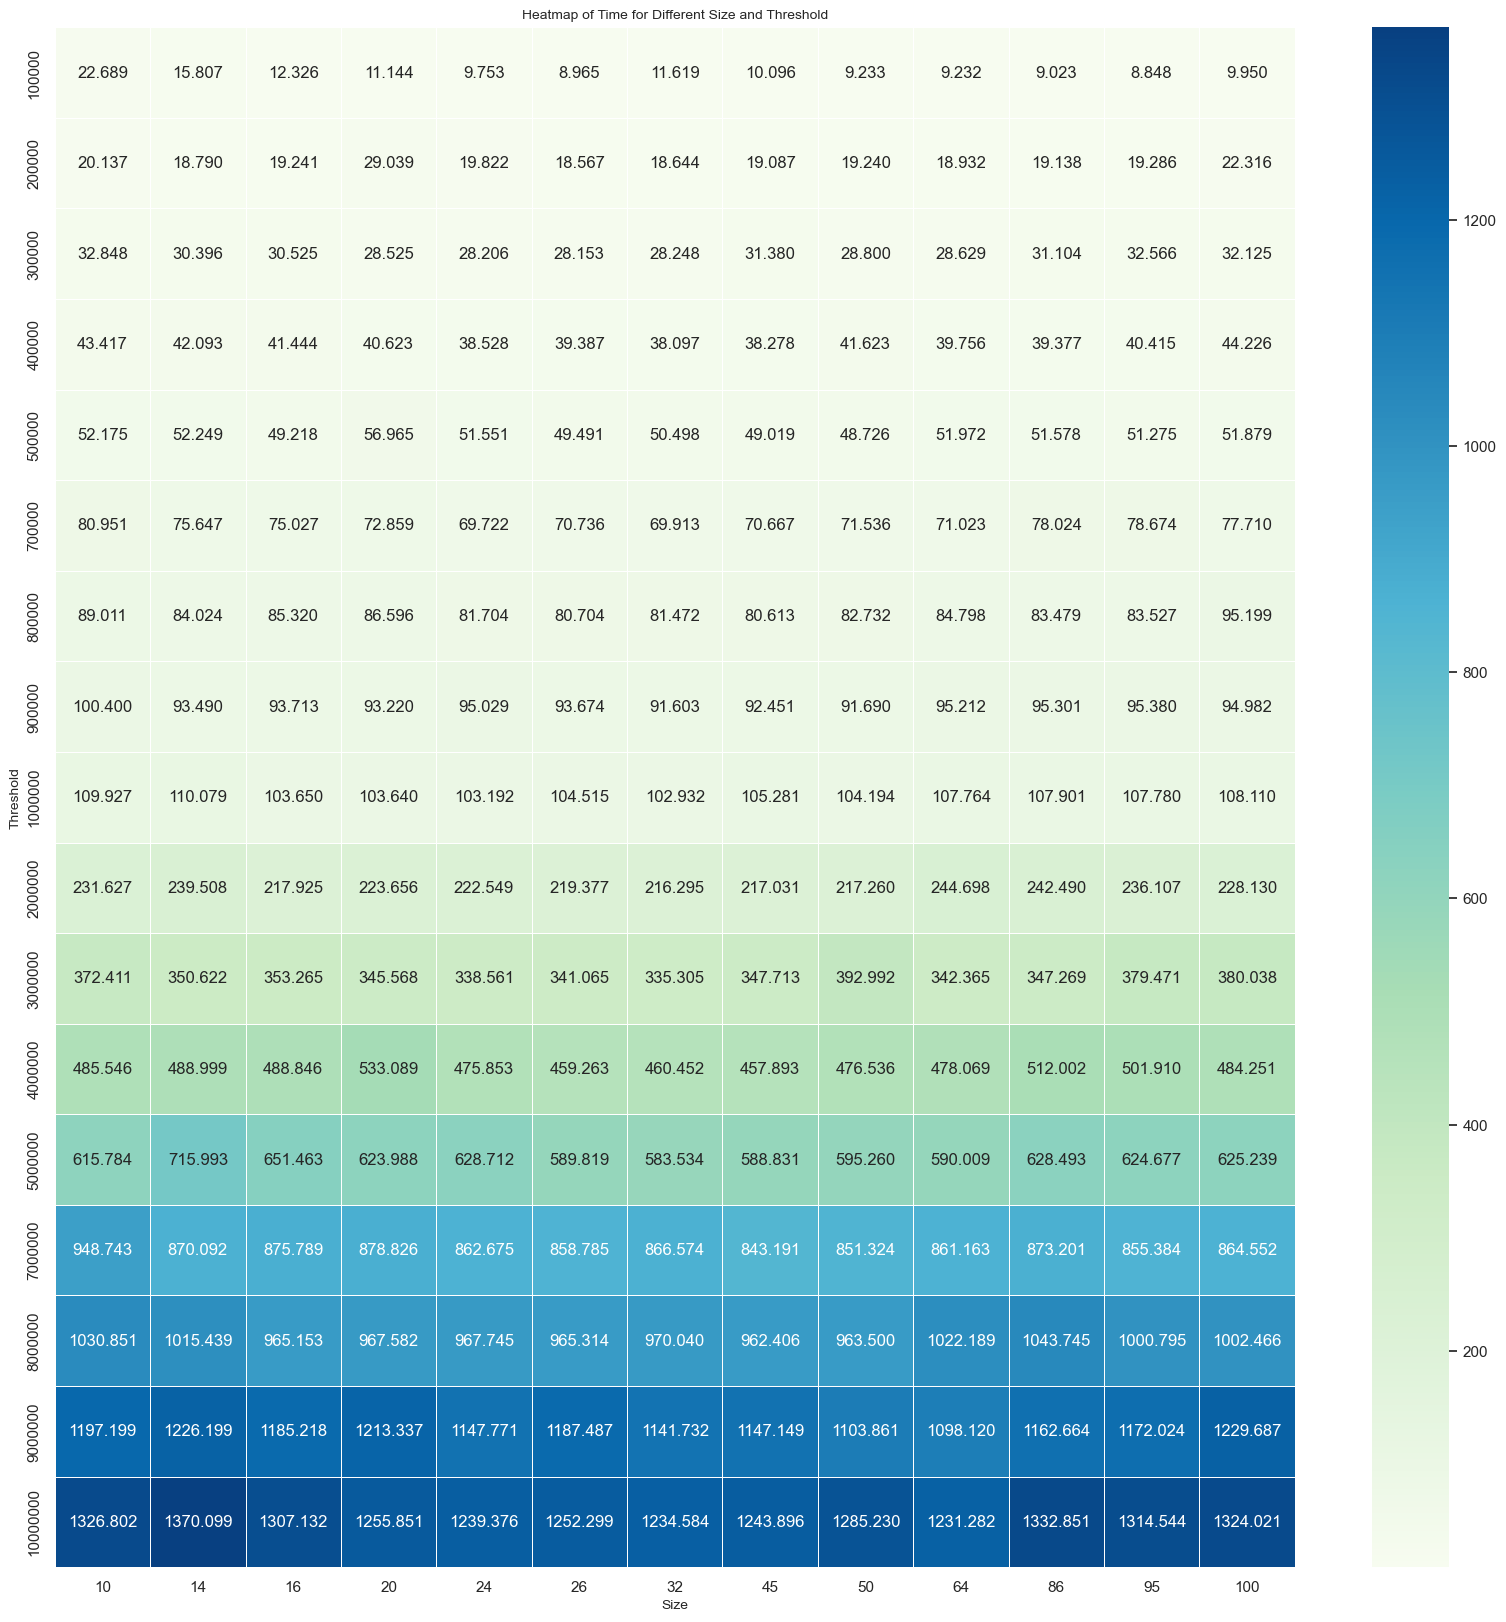

In [4]:
heatmap_data = joint_DF.pivot( "Size", "Threshold", "CPU Time (ms)")

plt.figure(figsize=(20, 20))  # Set figure size
sb.heatmap(heatmap_data, cmap="GnBu", annot=True, fmt=".3f", linewidths=.5)

plt.title('Heatmap of Time for Different Size and Threshold', fontsize=10)
plt.xlabel('Size', fontsize=10)
plt.ylabel('Threshold', fontsize=10)

plt.show()

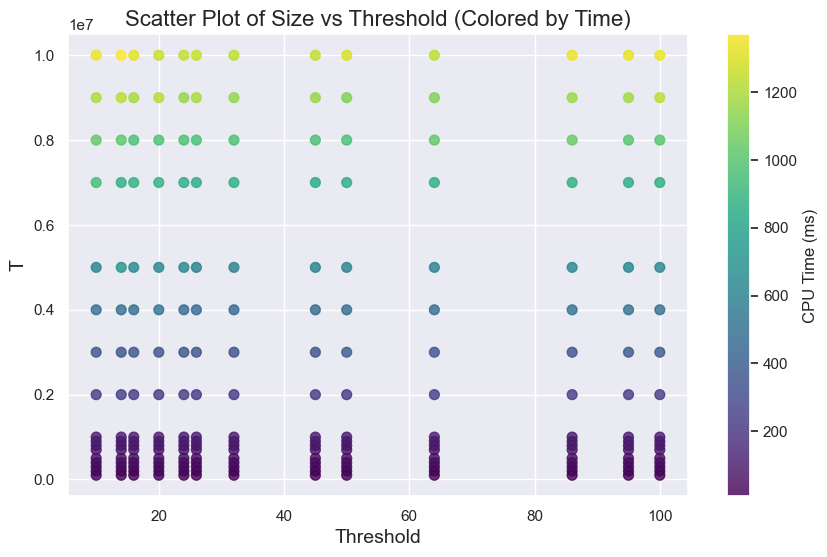

In [5]:
y = joint_DF['Size']         # X-axis: Size
x = joint_DF['Threshold']    # Y-axis: Threshold
time = joint_DF['CPU Time (ms)']  # Intensity: Time

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=time, cmap='viridis', s=50, alpha=0.8)

cbar = plt.colorbar(scatter)
cbar.set_label('CPU Time (ms)', fontsize=12)

plt.title('Scatter Plot of Size vs Threshold (Colored by Time)', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('T', fontsize=14)

plt.show()

In [6]:
### Step 1: Group by 'Size' and find the minimum 'CPU Time (ms)' for each size
min_time_by_size = joint_DF.groupby('Size')['CPU Time (ms)'].min().reset_index()

# Step 2: Merge with the original data to get the corresponding 'Threshold' values
fastest_times_with_threshold = pd.merge(min_time_by_size, joint_DF, on=['Size', 'CPU Time (ms)'])

# Step 3: Display the result
print(fastest_times_with_threshold)

        Size  CPU Time (ms)  Threshold
0     100000          8.848         95
1     200000         18.567         26
2     300000         28.153         26
3     400000         38.097         32
4     500000         48.726         50
5     700000         69.722         24
6     800000         80.613         45
7     900000         91.603         32
8    1000000        102.932         32
9    2000000        216.295         32
10   3000000        335.305         32
11   4000000        457.893         45
12   5000000        583.534         32
13   7000000        843.191         45
14   8000000        962.406         45
15   9000000       1098.120         64
16  10000000       1231.282         64


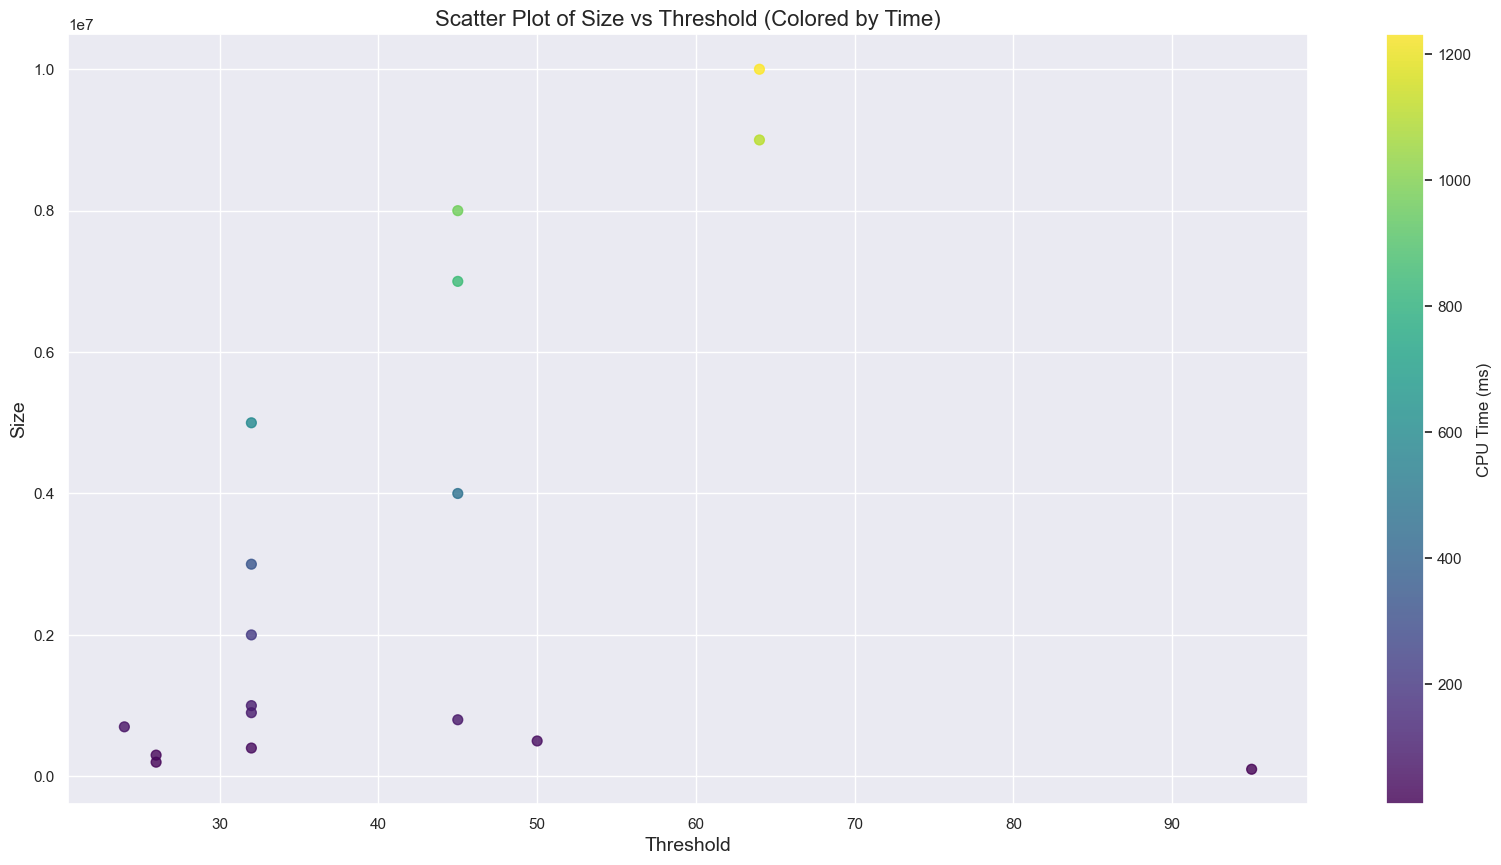

In [7]:
y = fastest_times_with_threshold['Size']         # X-axis: Size
x = fastest_times_with_threshold['Threshold']    # Y-axis: Threshold
time = fastest_times_with_threshold['CPU Time (ms)']  # Intensity: Time

plt.figure(figsize=(20, 10))
scatter = plt.scatter(x, y, c=time, cmap='viridis', s=50, alpha=0.8)

cbar = plt.colorbar(scatter)
cbar.set_label('CPU Time (ms)', fontsize=12)

plt.title('Scatter Plot of Size vs Threshold (Colored by Time)', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Size', fontsize=14)

plt.show()

<Axes: xlabel='Time (seconds)', ylabel='Algorithm'>

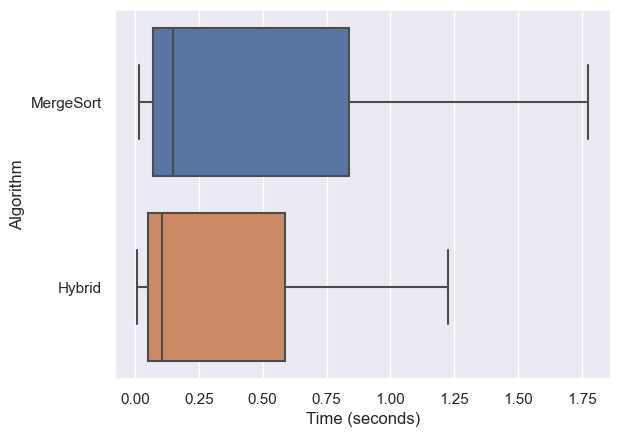

In [52]:
SortingComparison_data = pd.read_csv('Comparisons_Part_D.csv')
time_df_compare = SortingComparison_data.drop(columns = ['Comparisons'])

sb.boxplot(time_df_compare, x = 'Time (seconds)', y = 'Algorithm')

<Axes: xlabel='Comparisons', ylabel='Algorithm'>

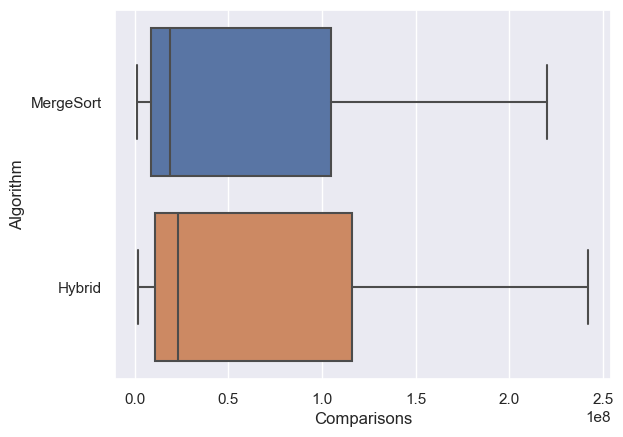

In [53]:
Comparisons_df_compare = SortingComparison_data.drop(columns = ['Time (seconds)'])

sb.boxplot(Comparisons_df_compare, x = 'Comparisons', y = 'Algorithm')

In [39]:
SortingComparison_data.head()

,Algorithm,Time (seconds),Comparisons
0,MergeSort,1.799996,220102500
1,Hybrid,1.277699,242323906
